In [2]:
import sys 
sys.path.insert(0, '/home/ray/default')

import os
from util.utils import (
    generate_output_path,
    prompt_for_hugging_face_token
)
import ray
import os
from typing import Dict
import numpy as np
from vllm import LLM, SamplingParams

Failed to import from vllm._C with ImportError('libcuda.so.1: cannot open shared object file: No such file or directory')


In [3]:
## https://huggingface.co/datasets/DBQ/Burberry.Product.prices.United.States?row=0
HF_DATA = "DBQ/Burberry.Product.prices.United.States"

BASE_PATH = 's3://anyscale-customer-dataplane-data-production-us-east-2/artifact_storage/org_6687q89lgh27q3z41zesm2fsq6/cld_j25ipm5kli358v41pn9c96gjg3/BurberryData:john_:kpbdm'
IMG_PATH = BASE_PATH + "/images"
DATA_PATH = BASE_PATH + "/data"
CAPTION_PATH = BASE_PATH + "/captions/2"

IMG_PATH_TEST = "/home/ray/default/data/images"

In [4]:
HF_MODEL = "google/paligemma-3b-mix-224"

In [5]:
data = ray.data.read_parquet(CAPTION_PATH).limit(100)

2024-09-23 23:19:55,680	INFO worker.py:1596 -- Connecting to existing Ray cluster at address: 100.72.99.113:6379...
2024-09-23 23:19:55,687	INFO worker.py:1772 -- Connected to Ray cluster. View the dashboard at https://session-33eser3czbha2i3jm7g2t5am82.i.anyscaleuserdata.com 
2024-09-23 23:19:55,689	INFO packaging.py:358 -- Pushing file package 'gcs://_ray_pkg_4955ef52f2d02916b02dcd31b0fc9f8253b6b0ee.zip' (0.15MiB) to Ray cluster...
2024-09-23 23:19:55,691	INFO packaging.py:371 -- Successfully pushed file package 'gcs://_ray_pkg_4955ef52f2d02916b02dcd31b0fc9f8253b6b0ee.zip'.


Parquet Files Sample 0:   0%|          | 0/2 [00:00<?, ? file/s]

(autoscaler +16m20s) Tip: use `ray status` to view detailed cluster status. To disable these messages, set RAY_SCHEDULER_EVENTS=0.
(autoscaler +16m20s) [autoscaler] Downscaling node i-0877670e489ab6cfd (node IP: 100.86.120.36) due to node idle termination.


In [11]:
data = data.take_batch(10)

2024-09-23 23:22:01,896	INFO streaming_executor.py:108 -- Starting execution of Dataset. Full logs are in /tmp/ray/session_2024-09-23_21-33-43_660012_2337/logs/ray-data
2024-09-23 23:22:01,897	INFO streaming_executor.py:109 -- Execution plan of Dataset: InputDataBuffer[Input] -> TaskPoolMapOperator[ReadParquet] -> LimitOperator[limit=100] -> LimitOperator[limit=10]


- ReadParquet->SplitBlocks(4) 1: 0 bundle [00:00, ? bundle/s]

- limit=100 2: 0 bundle [00:00, ? bundle/s]

- limit=10 3: 0 bundle [00:00, ? bundle/s]

Running 0: 0 bundle [00:00, ? bundle/s]

In [13]:
data

{'captions': array(['a blue plaid scarf with a white tag on it.',
        'a black wallet with a tb logo on it.',
        'A pair of khaki shorts with a button on the front.',
        'a black bag with a plaid pattern on it.',
        'a blue plaid scarf with a white tag on it.',
        "a makeup item that says 'bourjois' on it",
        'a black wallet with a tb logo on it.',
        'A pair of khaki shorts with a button on the front.',
        "a tan sweater with a bear on it that says 'burberry'",
        'a black fanny pack with a zipper on it'], dtype=object),
 'path': array(['anyscale-customer-dataplane-data-production-us-east-2/artifact_storage/org_6687q89lgh27q3z41zesm2fsq6/cld_j25ipm5kli358v41pn9c96gjg3/BurberryData:john_:kpbdm/images/0003C5D9-CD9D-4853-8A4C-86B331349517.png',
        'anyscale-customer-dataplane-data-production-us-east-2/artifact_storage/org_6687q89lgh27q3z41zesm2fsq6/cld_j25ipm5kli358v41pn9c96gjg3/BurberryData:john_:kpbdm/images/001495F3-0444-4E82-B197-3B13

In [24]:
from PIL import Image
from IPython.display import display
imgs = ray.data.read_images(['s3://' + path for path in data['path']], include_paths=True).take_all()
img_dict = {img['path']: img['image'] for img in imgs}

2024-09-23 23:32:08,571	INFO streaming_executor.py:108 -- Starting execution of Dataset. Full logs are in /tmp/ray/session_2024-09-23_21-33-43_660012_2337/logs/ray-data
2024-09-23 23:32:08,572	INFO streaming_executor.py:109 -- Execution plan of Dataset: InputDataBuffer[Input] -> TaskPoolMapOperator[ExpandPaths] -> TaskPoolMapOperator[ReadFiles]


- ExpandPaths 1: 0 bundle [00:00, ? bundle/s]

- ReadFiles 2: 0 bundle [00:00, ? bundle/s]

Running 0: 0 bundle [00:00, ? bundle/s]

a blue plaid scarf with a white tag on it.


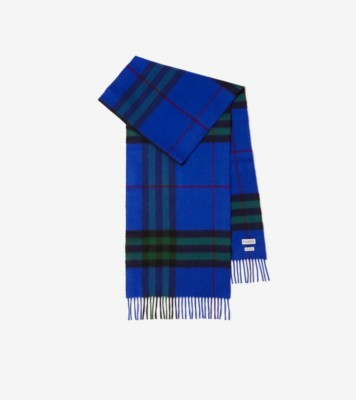

a black wallet with a tb logo on it.


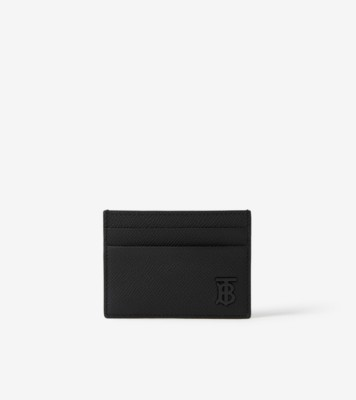

A pair of khaki shorts with a button on the front.


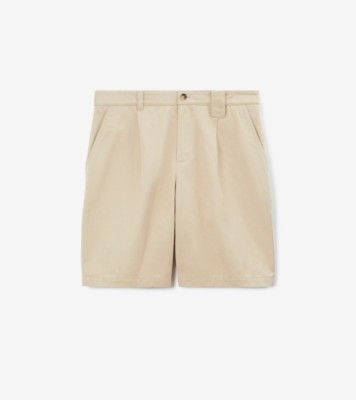

a black bag with a plaid pattern on it.


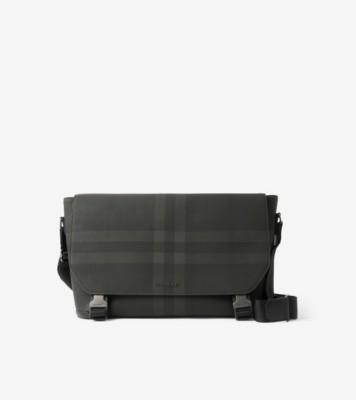

a blue plaid scarf with a white tag on it.


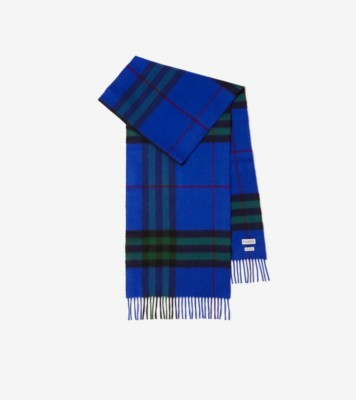

a makeup item that says 'bourjois' on it


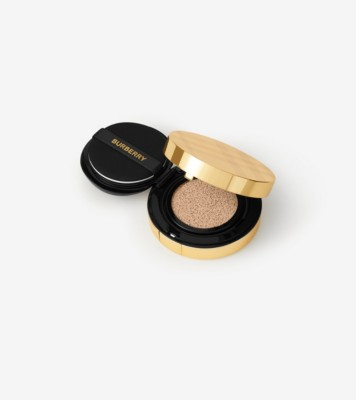

a black wallet with a tb logo on it.


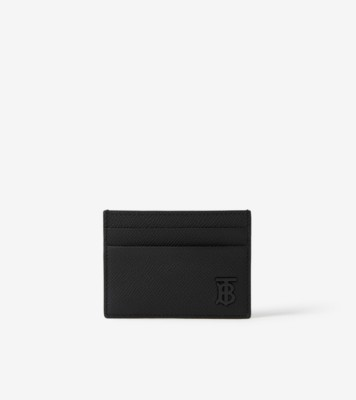

A pair of khaki shorts with a button on the front.


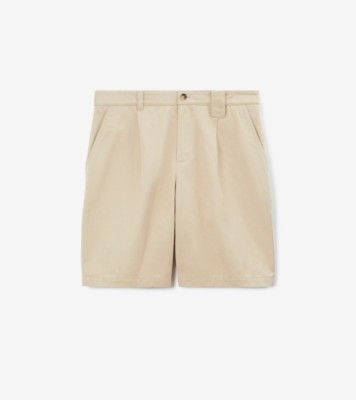

a tan sweater with a bear on it that says 'burberry'


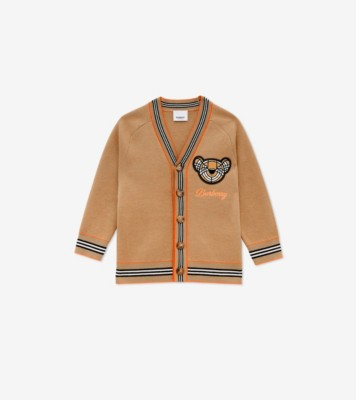

a black fanny pack with a zipper on it


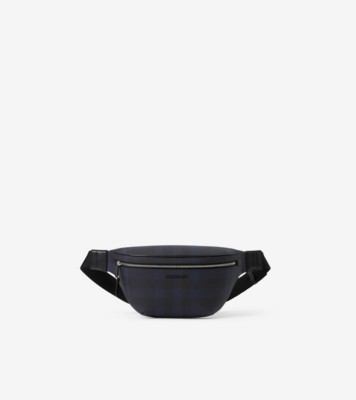

In [27]:
for caption, path in zip(data['captions'], data['path']):
    print(caption)
    display(Image.fromarray(img_dict[path]))